Student Number: 220223597

# Feature Engineering CW



## All steps must be done programmatically

### Import required packages

In [1658]:
# to handle datasets
import pandas as pd
import numpy as np

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# suppress some warning
pd.options.mode.chained_assignment = None  # default='warn'

# Add Imports here


### Load the data and Plot a Histogram of the SalePrice column

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

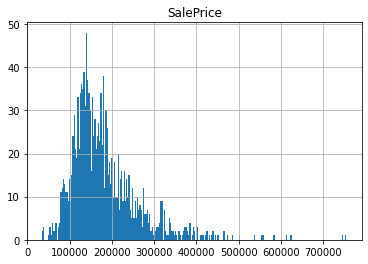

In [1659]:
# load dataset
data = pd.read_csv(r'/house-price-data.csv')

data.hist(column='SalePrice',  bins = 250)

### 1- The SalePrice column is not normally distributed (i.e. not Gaussian), prove this by running a statistical test and obtaining and interpreting the p-value (you can use if else to check the p-value and interpret it). (5 Marks)

In [1660]:
data['SalePrice'], data.columns

(0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64,
 Index(['LotFrontage', 'LotArea', 'Alley', 'LandContour', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch',

In [1661]:
# Test to check normality of the SalePrice column
# do a normality test

"""
norm = stats.normaltest(data['SalePrice'])
norm.statistic
print(norm)
shap = stats.shapiro(data['SalePrice'])
print(shap)
"""
import numpy
from scipy import stats

array_sales = np.array(data['SalePrice'])
x = array_sales

res = stats.normaltest(x)
res.statistic

610.8359109472653

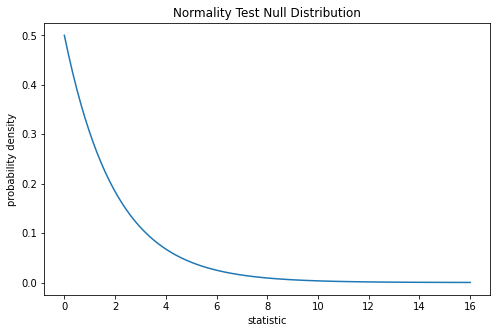

In [1662]:
import matplotlib.pyplot as plt
dist = stats.chi2(df=2)
stat_vals = np.linspace(0, 16, 100)
pdf = dist.pdf(stat_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(stat_vals, pdf)
    ax.set_title("Normality Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

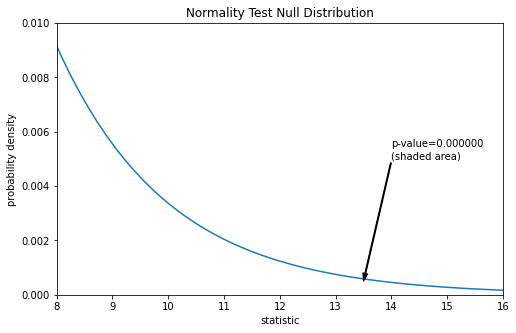

In [1663]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(res.statistic)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (13.5, 5e-4), (14, 5e-3), arrowprops=props)
i = stat_vals >= res.statistic  # index more extreme statistic values
ax.fill_between(stat_vals[i], y1=0, y2=pdf[i])
ax.set_xlim(8, 16)
ax.set_ylim(0, 0.01)
plt.show()

In [1664]:
res.pvalue

2.283848353787728e-133

"if there is a low probability of sampling data from a normally distributed population that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the weights were not drawn from a normal distribution." (Scipy, 2023)



In [1665]:
import matplotlib.pyplot as plt


#Todo

"""
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
    
ref = stats.monte_carlo_test(shap, stats.norm.rvs, statistic,
                             alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.65, 1, 50)
def plot(ax):  # we'll re-use this
    ax.hist(ref.null_distribution, density=True, bins=bins)
    ax.set_title("Shapiro-Wilk Test Null Distribution \n"
                 "(Monte Carlo Approximation, 11 Observations)")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={shap.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (0.75, 0.1), (0.68, 0.7), arrowprops=props)
i_extreme = np.where(bins <= shap.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.65, 0.9)
plt.ylim(0, 4)
plt.show
res.pvalue

#scipy(2023)
"""

'\ndef statistic(x):\n    # Get only the `shapiro` statistic; ignore its p-value\n    return stats.shapiro(x).statistic\n    \nref = stats.monte_carlo_test(shap, stats.norm.rvs, statistic,\n                             alternative=\'less\')\n\nfig, ax = plt.subplots(figsize=(8, 5))\nbins = np.linspace(0.65, 1, 50)\ndef plot(ax):  # we\'ll re-use this\n    ax.hist(ref.null_distribution, density=True, bins=bins)\n    ax.set_title("Shapiro-Wilk Test Null Distribution \n"\n                 "(Monte Carlo Approximation, 11 Observations)")\n    ax.set_xlabel("statistic")\n    ax.set_ylabel("probability density")\nplot(ax)\nplt.show()\n\nfig, ax = plt.subplots(figsize=(8, 5))\nplot(ax)\nannotation = (f\'p-value={shap.pvalue:.6f}\n(highlighted area)\')\nprops = dict(facecolor=\'black\', width=1, headwidth=5, headlength=8)\n_ = ax.annotate(annotation, (0.75, 0.1), (0.68, 0.7), arrowprops=props)\ni_extreme = np.where(bins <= shap.statistic)[0]\nfor i in i_extreme:\n    ax.patches[i].set_color(\'C

### Split data into Train and Test sub-datasets
### Do not change this code

In [1666]:
from sklearn.model_selection import train_test_split

### Split data into train and test sets 
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, # features or predictive variables
    y, # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=10, # we are setting the seed here
)

X_train.shape, X_test.shape

((1022, 54), (438, 54))

### 2. Create a list of all categorical variables (by checking their type in the original dataset). (2 marks)
Correct solution says there are 19 of them.

In [1667]:
# let's identify the categorical variables
# we will capture those of type object

cols = data.columns

num_cols = data._get_numeric_data().columns
cat_vars = list(set(cols) - set(num_cols))

#data.T.values.tolist()

# number of categorical variables
len(cat_vars)

#https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical


19

In [1668]:
data.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LandContour', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

### 3. Using the training set (X_train) Create a list of all categorical variables that contain missing data and print percentage of missing values per variable. (3 marks)

In [1669]:
# make a list of the categorical variables that contain missing values

X_train

# print percentage of missing values per variable


,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold
912,51.0,6120,NaN,Lvl,1Fam,1Story,5,7,1925,1950,Gable,0.0,TA,TA,TA,TA,No,Rec,489,Unf,0,279,768,TA,1015,0,0,1015,0,0,1,0,3,1,TA,6,0,NaN,1925.0,Unf,1,450,TA,TA,0,0,112,0,120,0,MnPrv,620,7,2006
373,79.0,10634,NaN,Lvl,1Fam,1Story,5,6,1953,1953,Gable,0.0,TA,TA,TA,TA,No,BLQ,428,LwQ,180,0,608,TA,1319,0,0,1319,1,0,1,0,3,1,TA,5,0,NaN,1953.0,Unf,1,270,TA,TA,66,0,0,0,0,0,GdWo,0,11,2009
20,101.0,14215,NaN,Lvl,1Fam,2Story,8,5,2005,2006,Gable,380.0,Gd,TA,Ex,TA,Av,Unf,0,Unf,0,1158,1158,Ex,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,1,Gd,2005.0,RFn,3,853,TA,TA,240,154,0,0,0,0,NaN,0,11,2006
800,79.0,12798,NaN,HLS,1Fam,2Story,6,5,1997,1997,Gable,0.0,TA,TA,Gd,TA,Gd,GLQ,462,Unf,0,154,616,Gd,616,1072,0,1688,1,0,2,1,4,1,Gd,8,0,NaN,1997.0,RFn,2,603,TA,TA,403,114,185,0,0,0,NaN,400,5,2008
152,NaN,14803,NaN,Lvl,1Fam,2Story,6,5,1971,1971,Gable,252.0,TA,TA,TA,TA,No,Rec,416,Unf,0,409,825,Gd,1097,896,0,1993,0,0,2,1,4,1,TA,8,1,Gd,1971.0,RFn,2,495,TA,TA,0,66,0,0,0,0,GdWo,0,6,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,1905,2000,Gable,0.0,TA,TA,Fa,TA,No,Unf,0,Unf,0,482,482,Ex,1221,691,0,1912,0,0,2,0,3,2,TA,7,1,TA,2003.0,Unf,2,672,Gd,TA,0,25,212,0,0,0,NaN,0,4,2008
1344,85.0,11103,NaN,Lvl,1Fam,2Story,7,5,2006,2006,Gable,0.0,Gd,TA,Gd,TA,No,Unf,0,Unf,0,728,728,Ex,728,728,0,1456,0,0,2,1,3,1,Gd,8,1,TA,2006.0,Fin,2,440,TA,TA,0,0,0,0,0,0,NaN,0,7,2007
527,67.0,14948,NaN,Lvl,1Fam,2Story,9,5,2008,2008,Hip,268.0,Ex,TA,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,Ex,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,1,Gd,2008.0,Fin,3,858,TA,TA,126,66,0,0,0,0,NaN,0,11,2008
1149,50.0,9000,NaN,Lvl,1Fam,2Story,7,9,1920,1988,Hip,0.0,TA,Gd,TA,TA,No,ALQ,624,Unf,0,26,650,Ex,832,650,0,1482,0,1,1,0,3,1,TA,7,0,NaN,1930.0,Unf,2,324,TA,TA,0,0,0,0,0,0,NaN,0,7,2009


In [1670]:
#print(cat_vars)


def missing_to_pct(data, vars):

    variables_all = []
    dtypes = []
    with_missing = []
    pc_missing = []
    with_missing_final = []

    for col in data:
        if col in vars:
            dtypes.append(data[col].dtype)
            variables_all.append(col)
            pc_missing.append(data[col].isna().sum() / len(data[col]))


    variables_cat = [i for i in variables_all if i in vars]

    output = pd.DataFrame({
        'variable': variables_all, 
        'dtype': dtypes,
        'pc_missing': pc_missing
        })    

    return output


output = missing_to_pct(X_train, cat_vars)
output
#https://practicaldatascience.co.uk/data-science/how-to-use-isna-to-check-for-missing-values-in-pandas-dataframes

,variable,dtype,pc_missing
0,Alley,object,0.934442
1,LandContour,object,0.000000
2,BldgType,object,0.000000
3,HouseStyle,object,0.000000
4,RoofStyle,object,0.000000
5,ExterQual,object,0.000000
6,ExterCond,object,0.000000
7,BsmtQual,object,0.025440
8,BsmtCond,object,0.025440
9,BsmtExposure,object,0.025440


In [1671]:
def to_list(data):

    data['pc_missing'] = data['pc_missing'].astype(float)
    data = data[(data != 0.0).all(axis=1)]
    sorted = data.sort_values(by='pc_missing', ascending=False)
    #sorted
    sorted = sorted[['variable', 'pc_missing']]
    f_list = sorted.values.tolist()

    return sorted, f_list

sorted, f_list = to_list(output)
f_list, sorted

#https://stackoverflow.com/questions/21164910/how-do-i-delete-a-column-that-contains-only-zeros-in-pandas

([['Alley', 0.9344422700587084],
  ['Fence', 0.8052837573385518],
  ['FireplaceQu', 0.46868884540117417],
  ['GarageFinish', 0.053816046966731895],
  ['GarageQual', 0.053816046966731895],
  ['GarageCond', 0.053816046966731895],
  ['BsmtQual', 0.025440313111545987],
  ['BsmtCond', 0.025440313111545987],
  ['BsmtExposure', 0.025440313111545987],
  ['BsmtFinType1', 0.025440313111545987],
  ['BsmtFinType2', 0.025440313111545987]],
         variable  pc_missing
 0          Alley    0.934442
 18         Fence    0.805284
 14   FireplaceQu    0.468689
 15  GarageFinish    0.053816
 16    GarageQual    0.053816
 17    GarageCond    0.053816
 7       BsmtQual    0.025440
 8       BsmtCond    0.025440
 9   BsmtExposure    0.025440
 10  BsmtFinType1    0.025440
 11  BsmtFinType2    0.025440)

In [1672]:

def flatten(xss):
    return [x for xs in xss for x in xs]

flatten(f_list)


['Alley',
 0.9344422700587084,
 'Fence',
 0.8052837573385518,
 'FireplaceQu',
 0.46868884540117417,
 'GarageFinish',
 0.053816046966731895,
 'GarageQual',
 0.053816046966731895,
 'GarageCond',
 0.053816046966731895,
 'BsmtQual',
 0.025440313111545987,
 'BsmtCond',
 0.025440313111545987,
 'BsmtExposure',
 0.025440313111545987,
 'BsmtFinType1',
 0.025440313111545987,
 'BsmtFinType2',
 0.025440313111545987]

### 4. Using the result of the previous step: For categorical variables with more than 10% of data missing, replace missing data with the word 'Missing', in other variables replace the missing data with the most frequent category in  the training set (Apply the replacement to X_train and X_test and make sure it is based on the results you have obtained from the training set). (5 marks)

In [1673]:
"""
for column in sorted[['variable', 'pc_missing']]:
    columnSeriesObj = sorted[column]
    #print('Column Name : ', column)
    #print('Column Contents : ', columnSeriesObj.values)
    print(columnSeriesObj.values)
    """

"\nfor column in sorted[['variable', 'pc_missing']]:\n    columnSeriesObj = sorted[column]\n    #print('Column Name : ', column)\n    #print('Column Contents : ', columnSeriesObj.values)\n    print(columnSeriesObj.values)\n    "

In [1674]:
rslt_df = sorted.loc[sorted['pc_missing'] >= 0.1] 
ten_pct = rslt_df['variable']
ten_pct = ten_pct.tolist()

In [1675]:
not_ten_pct = sorted.loc[sorted['pc_missing'] <= 0.1]
not_ten_pct = not_ten_pct['variable']
not_ten_pct = not_ten_pct.tolist()

In [1676]:
## X_train replacement ##
# replace missing values in X_train and X_test with new label: "Missing"

filtered = X_train.filter(ten_pct)
print(filtered.isnull().sum())

for column in filtered.columns:
    filtered[column].fillna('Missing', inplace=True)
filtered.isnull().sum()

Alley          955
Fence          823
FireplaceQu    479
dtype: int64


Alley          0
Fence          0
FireplaceQu    0
dtype: int64

In [1677]:
## X_test replacement ##
# replace missing values in X_train and X_test with new label: "Missing"

filtered_test = X_test.filter(ten_pct)
print(filtered_test.isnull().sum())

for column in filtered_test.columns:
    filtered_test[column].fillna('Missing', inplace=True)
    
filtered_test.isnull().sum()

Alley          414
Fence          356
FireplaceQu    211
dtype: int64


Alley          0
Fence          0
FireplaceQu    0
dtype: int64

In [1678]:
#X_train.apply(lambda column: column[X_train['Courses'].isin(ten_pct)])
not_ten_pct

['GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2']

In [1679]:
## X_train replacement ##
# replace missing values in X_train and X_test with the mode of each variable

other_filter = X_train.filter(not_ten_pct)
#other_filter.replace(np.nan, np.argmax)
print(f'Before replacement:\n\n{other_filter.isnull().sum()}')

for column in other_filter.columns:
    other_filter[column].fillna(other_filter[column].mode()[0], inplace=True)

other_filter.isnull().sum()

#https://stackoverflow.com/questions/40619445/how-to-replace-na-values-with-mode-of-a-dataframe-column-in-python

Before replacement:

GarageFinish    55
GarageQual      55
GarageCond      55
BsmtQual        26
BsmtCond        26
BsmtExposure    26
BsmtFinType1    26
BsmtFinType2    26
dtype: int64


GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [1680]:
## X_test replacement ##
# replace missing values in X_train and X_test with the mode of each variable

other_filter_T = X_test.filter(not_ten_pct)#other_filter.replace(np.nan, np.argmax)
print(other_filter_T.isnull().sum())

for column in other_filter_T.columns:
    other_filter_T[column].fillna(other_filter_T[column].mode()[0], inplace=True)

other_filter_T.isnull().sum()
    


GarageFinish    26
GarageQual      26
GarageCond      26
BsmtQual        11
BsmtCond        11
BsmtExposure    12
BsmtFinType1    11
BsmtFinType2    12
dtype: int64


GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [1681]:
#filtered.isnull().sum()

In [1682]:
# check that we have no missing information in the engineered variables
#other_filter.isnull().sum()

#rejoin dataframes categorical:


X_train_cat = filtered.join(other_filter)
X_test_cat = filtered_test.join(other_filter_T)


In [1683]:
X_train_cat

,Alley,Fence,FireplaceQu,GarageFinish,GarageQual,GarageCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
912,Missing,MnPrv,Missing,Unf,TA,TA,TA,TA,No,Rec,Unf
373,Missing,GdWo,Missing,Unf,TA,TA,TA,TA,No,BLQ,LwQ
20,Missing,Missing,Gd,RFn,TA,TA,Ex,TA,Av,Unf,Unf
800,Missing,Missing,Missing,RFn,TA,TA,Gd,TA,Gd,GLQ,Unf
152,Missing,GdWo,Gd,RFn,TA,TA,TA,TA,No,Rec,Unf
...,...,...,...,...,...,...,...,...,...,...,...
1393,Pave,Missing,TA,Unf,Gd,TA,Fa,TA,No,Unf,Unf
1344,Missing,Missing,TA,Fin,TA,TA,Gd,TA,No,Unf,Unf
527,Missing,Missing,Gd,Fin,TA,TA,Ex,TA,Av,GLQ,Unf
1149,Missing,Missing,Missing,Unf,TA,TA,TA,TA,No,ALQ,Unf


In [1684]:
print(X_train_cat.isnull().sum())

Alley           0
Fence           0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


In [1685]:
X_test_cat

,Alley,Fence,FireplaceQu,GarageFinish,GarageQual,GarageCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
854,Missing,Missing,Gd,Unf,TA,TA,TA,TA,Mn,ALQ,Rec
381,Pave,Missing,Gd,RFn,TA,TA,Gd,Gd,No,Unf,Unf
816,Missing,Missing,Gd,RFn,TA,TA,TA,TA,No,BLQ,Unf
577,Missing,Missing,Fa,RFn,TA,TA,TA,TA,Av,LwQ,ALQ
35,Missing,Missing,Gd,Fin,TA,TA,Ex,TA,Av,Unf,Unf
...,...,...,...,...,...,...,...,...,...,...,...
657,Missing,MnPrv,Gd,RFn,TA,TA,Gd,TA,No,Unf,Unf
411,Missing,Missing,Missing,Fin,TA,TA,TA,TA,Mn,Rec,Unf
861,Missing,Missing,Missing,Unf,TA,TA,TA,TA,Mn,BLQ,Unf
1175,Missing,Missing,TA,Fin,TA,TA,Gd,TA,No,GLQ,Unf


In [1686]:
print(X_test_cat.isnull().sum())

Alley           0
Fence           0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


### 5. Create a list of all numerical variables (do not include SalePrice). (2 marks)
Correct solution says there are 35 of them.

In [1687]:
# now let's identify the numerical variables

except_salep = data.loc[:, data.columns != "SalePrice"]
num_vars = except_salep._get_numeric_data().columns
num_vars
# number of numerical variables
len(num_vars)

35

### 6. Create a list of all numerical variables that contain missing data and print out the percentage of missing values per variable (use the training data). (3 marks)

In [1688]:
# make a list with the numerical variables that contain missing values

# print percentage of missing values per variable

output_two = missing_to_pct(X_train, num_vars)
output_two

,variable,dtype,pc_missing
0,LotFrontage,float64,0.173190
1,LotArea,int64,0.000000
2,OverallQual,int64,0.000000
3,OverallCond,int64,0.000000
4,YearBuilt,int64,0.000000
5,YearRemodAdd,int64,0.000000
6,MasVnrArea,float64,0.004892
7,BsmtFinSF1,int64,0.000000
8,BsmtFinSF2,int64,0.000000
9,BsmtUnfSF,int64,0.000000


In [1689]:
sorted_pct, pct_two = to_list(output_two)
sorted_pct, pct_two

(       variable  pc_missing
 0   LotFrontage    0.173190
 23  GarageYrBlt    0.053816
 6    MasVnrArea    0.004892,
 [['LotFrontage', 0.17318982387475537],
  ['GarageYrBlt', 0.053816046966731895],
  ['MasVnrArea', 0.004892367906066536]])

### 7. Using the result of the previous step: For numerical variables with less than 15% of data missing, replace missing data with the mean of the variable, in other variables replace the missing data with the median of the variable in the training set (Apply the replacement to X_train and X_test and make sure it is based on the results you have obtained from the training set).     (5 marks)

In [1690]:
rslt_df_two = sorted_pct.loc[sorted_pct['pc_missing'] <= 0.15] 
ten_pct_two = rslt_df_two['variable']
ten_pct_two = ten_pct_two.tolist()
ten_pct_two

['GarageYrBlt', 'MasVnrArea']

In [1691]:
## filter X_train +15% ##
##                ##

filtered_two = X_train.filter(ten_pct_two)
#filtered_two
print(filtered_two.isnull().sum())
for column in filtered_two.columns:
    #print(column)
    filtered_two[column].fillna(filtered_two[column].mean(), inplace=True)
filtered_two.isnull().sum()

GarageYrBlt    55
MasVnrArea      5
dtype: int64


GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [1692]:
## filter X_test +15% ##
##               ##

filtered_two_T = X_test.filter(ten_pct_two)
print(f'Before Filtering: {filtered_two_T.isnull().sum()}')

for column in filtered_two_T.columns:
    #print(column)
    filtered_two_T[column].fillna(filtered_two_T[column].mean(), inplace=True)
filtered_two_T.isnull().sum()

Before Filtering: GarageYrBlt    26
MasVnrArea      3
dtype: int64


GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [1693]:
rslt_df_two_less = sorted_pct.loc[sorted_pct['pc_missing'] >= 0.15] 
fifteen_pct_two_less = rslt_df_two_less['variable']
fifteen_pct_two_less = fifteen_pct_two_less.tolist()

In [1694]:
#fifteen_pct_two_less
## filter X_train -15% ##
##                ##

filtered_15_down = X_train.filter(fifteen_pct_two_less)
print(filtered_15_down.isnull().sum())
for column in filtered_15_down.columns:
    #print(column)
    filtered_15_down[column].fillna(filtered_15_down[column].median(), inplace=True)
filtered_15_down.isnull().sum()

LotFrontage    177
dtype: int64


LotFrontage    0
dtype: int64

In [1695]:
#fifteen_pct_two_less
## filter X_test -15% ##
##                ##

filtered_15_down_T = X_test.filter(fifteen_pct_two_less)
print(filtered_15_down_T.isnull().sum())
for column in filtered_15_down_T.columns:
    #print(column)
    filtered_15_down_T[column].fillna(filtered_15_down_T[column].median(), inplace=True)
filtered_15_down_T.isnull().sum()


LotFrontage    82
dtype: int64


LotFrontage    0
dtype: int64

In [1696]:
# variables to impute with the median
#with_mean = 

# variables to impute with the mean
#with_median = 

#filtered_two_T

In [1697]:
# replace missing values as we described above

#rejoin dataframes numerical:
#X_test_num = filtered_.join(filtered_15_down_T)


In [1698]:
X_train_num

,GarageYrBlt,MasVnrArea,LotFrontage
912,1925.0,0.0,51.0
373,1953.0,0.0,79.0
20,2005.0,380.0,101.0
800,1997.0,0.0,79.0
152,1971.0,252.0,70.0
...,...,...,...
1393,2003.0,0.0,60.0
1344,2006.0,0.0,85.0
527,2008.0,268.0,67.0
1149,1930.0,0.0,50.0


In [1699]:
X_train_num.isnull().sum()

GarageYrBlt    0
MasVnrArea     0
LotFrontage    0
dtype: int64

In [1700]:
X_test_num

,GarageYrBlt,MasVnrArea,LotFrontage
854,1955.000000,0.0,102.0
381,2006.000000,0.0,60.0
816,1954.000000,0.0,69.0
577,1966.000000,97.0,96.0
35,2004.000000,132.0,108.0
...,...,...,...
657,1931.000000,0.0,60.0
411,1955.000000,0.0,100.0
861,1965.000000,0.0,75.0
1175,1992.000000,337.0,85.0


In [1701]:
X_test_num.isnull().sum()

GarageYrBlt    0
MasVnrArea     0
LotFrontage    0
dtype: int64

In [1702]:
# check that we have no more missing values in the engineered variables
X_test_copy = X_test_num.join(X_test_cat)
X_test_copy

,GarageYrBlt,MasVnrArea,LotFrontage,Alley,Fence,FireplaceQu,GarageFinish,GarageQual,GarageCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
854,1955.000000,0.0,102.0,Missing,Missing,Gd,Unf,TA,TA,TA,TA,Mn,ALQ,Rec
381,2006.000000,0.0,60.0,Pave,Missing,Gd,RFn,TA,TA,Gd,Gd,No,Unf,Unf
816,1954.000000,0.0,69.0,Missing,Missing,Gd,RFn,TA,TA,TA,TA,No,BLQ,Unf
577,1966.000000,97.0,96.0,Missing,Missing,Fa,RFn,TA,TA,TA,TA,Av,LwQ,ALQ
35,2004.000000,132.0,108.0,Missing,Missing,Gd,Fin,TA,TA,Ex,TA,Av,Unf,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1931.000000,0.0,60.0,Missing,MnPrv,Gd,RFn,TA,TA,Gd,TA,No,Unf,Unf
411,1955.000000,0.0,100.0,Missing,Missing,Missing,Fin,TA,TA,TA,TA,Mn,Rec,Unf
861,1965.000000,0.0,75.0,Missing,Missing,Missing,Unf,TA,TA,TA,TA,Mn,BLQ,Unf
1175,1992.000000,337.0,85.0,Missing,Missing,TA,Fin,TA,TA,Gd,TA,No,GLQ,Unf


In [1703]:
X_train_copy = X_train_cat.join(X_train_num)
X_train_copy

,Alley,Fence,FireplaceQu,GarageFinish,GarageQual,GarageCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageYrBlt,MasVnrArea,LotFrontage
912,Missing,MnPrv,Missing,Unf,TA,TA,TA,TA,No,Rec,Unf,1925.0,0.0,51.0
373,Missing,GdWo,Missing,Unf,TA,TA,TA,TA,No,BLQ,LwQ,1953.0,0.0,79.0
20,Missing,Missing,Gd,RFn,TA,TA,Ex,TA,Av,Unf,Unf,2005.0,380.0,101.0
800,Missing,Missing,Missing,RFn,TA,TA,Gd,TA,Gd,GLQ,Unf,1997.0,0.0,79.0
152,Missing,GdWo,Gd,RFn,TA,TA,TA,TA,No,Rec,Unf,1971.0,252.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,Pave,Missing,TA,Unf,Gd,TA,Fa,TA,No,Unf,Unf,2003.0,0.0,60.0
1344,Missing,Missing,TA,Fin,TA,TA,Gd,TA,No,Unf,Unf,2006.0,0.0,85.0
527,Missing,Missing,Gd,Fin,TA,TA,Ex,TA,Av,GLQ,Unf,2008.0,268.0,67.0
1149,Missing,Missing,Missing,Unf,TA,TA,TA,TA,No,ALQ,Unf,1930.0,0.0,50.0


In [1704]:
common_columns_train = X_train.columns.intersection(X_train_copy.columns)
common_columns_test = X_test.columns.intersection(X_test_copy.columns)

In [1705]:
X_train[common_columns_train] = X_train_copy[common_columns_train]
X_train.isnull().sum()

LotFrontage      0
LotArea          0
Alley            0
LandContour      0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscVal          0
MoSold      

In [1706]:
X_test[common_columns_test] = X_test_copy[common_columns_test]
X_test.isnull().sum()

LotFrontage      0
LotArea          0
Alley            0
LandContour      0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscVal          0
MoSold      

### 8. In the train and test sets, replace the values of variables 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' with the time elapsed between them and the year in which the house was sold 'YrSold' and then drop the  'YrSold' column (5 marks)

In [1707]:
#new = pd.DataFrame()

X_train['YearBuilt'] = X_train['YrSold'] - X_train['YearBuilt']
X_train['YearRemodAdd'] = X_train['YrSold'] - X_train['YearRemodAdd']
X_train['GarageYrBlt'] = X_train['YrSold'] - X_train['GarageYrBlt']

X_test['YearBuilt'] = X_test['YrSold'] - X_test['YearBuilt']
X_test['YearRemodAdd'] = X_test['YrSold'] - X_test['YearRemodAdd']
X_test['GarageYrBlt'] = X_test['YrSold'] - X_test['GarageYrBlt']


In [1708]:
# now we drop YrSold
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

In [1709]:
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,TA,TA,TA,TA,No,Rec,489,Unf,0,279,768,TA,1015,0,0,1015,0,0,1,0,3,1,TA,6,0,Missing,81.0,Unf,1,450,TA,TA,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,TA,TA,TA,TA,No,BLQ,428,LwQ,180,0,608,TA,1319,0,0,1319,1,0,1,0,3,1,TA,5,0,Missing,56.0,Unf,1,270,TA,TA,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,Gd,TA,Ex,TA,Av,Unf,0,Unf,0,1158,1158,Ex,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,1,Gd,1.0,RFn,3,853,TA,TA,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,TA,TA,Gd,TA,Gd,GLQ,462,Unf,0,154,616,Gd,616,1072,0,1688,1,0,2,1,4,1,Gd,8,0,Missing,11.0,RFn,2,603,TA,TA,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,TA,TA,TA,TA,No,Rec,416,Unf,0,409,825,Gd,1097,896,0,1993,0,0,2,1,4,1,TA,8,1,Gd,35.0,RFn,2,495,TA,TA,0,66,0,0,0,0,GdWo,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,TA,TA,Fa,TA,No,Unf,0,Unf,0,482,482,Ex,1221,691,0,1912,0,0,2,0,3,2,TA,7,1,TA,5.0,Unf,2,672,Gd,TA,0,25,212,0,0,0,Missing,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,Gd,TA,Gd,TA,No,Unf,0,Unf,0,728,728,Ex,728,728,0,1456,0,0,2,1,3,1,Gd,8,1,TA,1.0,Fin,2,440,TA,TA,0,0,0,0,0,0,Missing,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,Ex,TA,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,Ex,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,1,Gd,0.0,Fin,3,858,TA,TA,126,66,0,0,0,0,Missing,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,TA,Gd,TA,TA,No,ALQ,624,Unf,0,26,650,Ex,832,650,0,1482,0,1,1,0,3,1,TA,7,0,Missing,79.0,Unf,2,324,TA,TA,0,0,0,0,0,0,Missing,0,7


In [1710]:
X_test

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
854,102.0,17920,Missing,Lvl,1Fam,1Story,5,4,51,32,Hip,0.0,TA,TA,TA,TA,Mn,ALQ,306,Rec,1085,372,1763,TA,1779,0,0,1779,1,0,1,1,3,1,TA,6,1,Gd,51.000000,Unf,2,454,TA,TA,0,418,0,0,312,0,Missing,0,7
381,60.0,7200,Pave,Lvl,1Fam,1Story,7,5,0,0,Gable,0.0,Gd,TA,Gd,Gd,No,Unf,0,Unf,0,1293,1293,Ex,1301,0,0,1301,1,0,2,0,2,1,Gd,5,1,Gd,0.000000,RFn,2,572,TA,TA,216,121,0,0,0,0,Missing,0,8
816,69.0,11425,Missing,Lvl,1Fam,1Story,5,6,52,52,Gable,0.0,TA,TA,TA,TA,No,BLQ,486,Unf,0,522,1008,Gd,1008,0,0,1008,0,0,1,0,2,1,TA,4,1,Gd,52.000000,RFn,1,275,TA,TA,0,0,120,0,0,0,Missing,0,7
577,96.0,11777,Missing,Lvl,1Fam,SLvl,5,6,40,40,Gable,97.0,TA,TA,TA,TA,Av,LwQ,328,ALQ,551,285,1164,Ex,1320,0,0,1320,1,0,1,0,3,1,TA,6,2,Fa,40.000000,RFn,2,564,TA,TA,160,68,240,0,0,0,Missing,0,5
35,108.0,13418,Missing,Lvl,1Fam,2Story,8,5,2,1,Gable,132.0,Gd,TA,Ex,TA,Av,Unf,0,Unf,0,1117,1117,Ex,1132,1320,0,2452,0,0,3,1,4,1,Gd,9,1,Gd,2.000000,Fin,3,691,TA,TA,113,32,0,0,0,0,Missing,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,Missing,HLS,1Fam,2Story,7,6,77,8,Gable,0.0,TA,Fa,Gd,TA,No,Unf,0,Unf,0,776,776,TA,851,651,0,1502,0,0,1,1,3,1,TA,6,1,Gd,77.000000,RFn,1,270,TA,TA,0,0,112,0,0,0,MnPrv,0,2
411,100.0,34650,Missing,Bnk,2fmCon,1Story,5,5,51,51,Hip,0.0,TA,TA,TA,TA,Mn,Rec,1056,Unf,0,0,1056,TA,1056,0,0,1056,1,0,1,0,3,1,TA,5,0,Missing,51.000000,Fin,2,572,TA,TA,264,0,0,0,0,0,Missing,0,1
861,75.0,11625,Missing,Lvl,2fmCon,1Story,5,4,45,45,Hip,0.0,TA,TA,TA,TA,Mn,BLQ,841,Unf,0,198,1039,Ex,1039,0,0,1039,1,0,1,1,3,1,TA,6,0,Missing,45.000000,Unf,2,504,TA,TA,0,0,0,0,0,0,Missing,0,4
1175,85.0,10678,Missing,Lvl,1Fam,1.5Fin,8,5,15,7,Hip,337.0,Gd,TA,Gd,TA,No,GLQ,700,Unf,0,983,1683,Ex,2129,743,0,2872,0,0,2,1,4,1,Gd,9,1,TA,15.000000,Fin,2,541,TA,TA,0,33,0,0,0,0,Missing,0,4


### 9. Apply mappings to categorical variables that have an order (5 marks)

Some of the categorical variables have values with an assigned order (in total there should be 14 of them), related to quality (For more information, check the data description file). This means, we can replace categories by numbers to determine quality. For example, values in the 'BsmtExposure' can be mapped as follows: 'No' can be mapped to 1, 'Mn' can be mapped to 2, 'Av' can be mapped to 3 and 'Gd' can be mapped to 4. 

One way of doing this is to manually create mappings similar to the example given. Each mapping can be saved as a Python dictionary and used to perform the actual mapping to transform the described variables from categorical to numerical.

To Make it easier for you, here are groups of variables that have the same mappings (Hint: you can map both categories 'Missing' and 'NA' to 0): 

- The following variable groups have the same mapping: 
    - ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond']
    - ['BsmtFinType1', 'BsmtFinType2']

- Each of the following variables has its own mapping: 'BsmtExposure', 'GarageFinish', 'Fence'

In [1711]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond'
            ]


## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets

#for (k,v) in qual_mappings.items():
 #   print(k,v)
#print("---------")

#Training replace

def map_replace(data, qual_mappings, qual_vars):

    for columns in data:
        if columns in qual_vars:
        #d = X_train[columns]
            for i,j in data[columns].items():
                for (k,v) in qual_mappings.items():
                    if j == k:
                        replaced = data[columns].replace([j], v, inplace=True) 

    return replaced

#https://copyprogramming.com/howto/check-column-value-in-pandas-stack-overflow

"""
for columns in X_train:
    if columns in qual_vars:
        #d = X_train[columns]
        for i,j in X_train[columns].items():
            for (k,v) in qual_mappings.items():
                if j == k:
                    X_train[columns].replace([j], v, inplace=True) 
"""
map_replace(X_train, qual_mappings, qual_vars)
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,No,Rec,489,Unf,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,Unf,1,450,3,3,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,No,BLQ,428,LwQ,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,Unf,1,270,3,3,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,Av,Unf,0,Unf,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,RFn,3,853,3,3,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,Gd,GLQ,462,Unf,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,RFn,2,603,3,3,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,No,Rec,416,Unf,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,RFn,2,495,3,3,0,66,0,0,0,0,GdWo,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,No,Unf,0,Unf,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,Unf,2,672,4,3,0,25,212,0,0,0,Missing,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,No,Unf,0,Unf,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,Fin,2,440,3,3,0,0,0,0,0,0,Missing,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,Av,GLQ,1330,Unf,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,Fin,3,858,3,3,126,66,0,0,0,0,Missing,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,No,ALQ,624,Unf,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,Unf,2,324,3,3,0,0,0,0,0,0,Missing,0,7


In [1712]:
#Testing replace
"""
for columns in X_test:
    if columns in qual_vars:
        #d = X_train[columns]
        for i,j in X_test[columns].items():
            for (k,v) in qual_mappings.items():
                if j == k:
                    X_test[columns].replace([j], v, inplace=True) 
"""

map_replace(X_test, qual_mappings, qual_vars)

In [1713]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

## Apply the mapping here
# Apply mapping on the train and test sets

map_replace(X_train, exposure_mappings, var)
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,Rec,489,Unf,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,Unf,1,450,3,3,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,BLQ,428,LwQ,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,Unf,1,270,3,3,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,Unf,0,Unf,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,RFn,3,853,3,3,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,GLQ,462,Unf,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,RFn,2,603,3,3,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,Rec,416,Unf,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,RFn,2,495,3,3,0,66,0,0,0,0,GdWo,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,1,Unf,0,Unf,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,Unf,2,672,4,3,0,25,212,0,0,0,Missing,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,1,Unf,0,Unf,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,Fin,2,440,3,3,0,0,0,0,0,0,Missing,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,3,GLQ,1330,Unf,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,Fin,3,858,3,3,126,66,0,0,0,0,Missing,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,1,ALQ,624,Unf,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,Unf,2,324,3,3,0,0,0,0,0,0,Missing,0,7


In [1714]:
map_replace(X_test, exposure_mappings, var)
X_test

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
854,102.0,17920,Missing,Lvl,1Fam,1Story,5,4,51,32,Hip,0.0,3,3,3,3,2,ALQ,306,Rec,1085,372,1763,3,1779,0,0,1779,1,0,1,1,3,1,3,6,1,4,51.000000,Unf,2,454,3,3,0,418,0,0,312,0,Missing,0,7
381,60.0,7200,Pave,Lvl,1Fam,1Story,7,5,0,0,Gable,0.0,4,3,4,4,1,Unf,0,Unf,0,1293,1293,5,1301,0,0,1301,1,0,2,0,2,1,4,5,1,4,0.000000,RFn,2,572,3,3,216,121,0,0,0,0,Missing,0,8
816,69.0,11425,Missing,Lvl,1Fam,1Story,5,6,52,52,Gable,0.0,3,3,3,3,1,BLQ,486,Unf,0,522,1008,4,1008,0,0,1008,0,0,1,0,2,1,3,4,1,4,52.000000,RFn,1,275,3,3,0,0,120,0,0,0,Missing,0,7
577,96.0,11777,Missing,Lvl,1Fam,SLvl,5,6,40,40,Gable,97.0,3,3,3,3,3,LwQ,328,ALQ,551,285,1164,5,1320,0,0,1320,1,0,1,0,3,1,3,6,2,2,40.000000,RFn,2,564,3,3,160,68,240,0,0,0,Missing,0,5
35,108.0,13418,Missing,Lvl,1Fam,2Story,8,5,2,1,Gable,132.0,4,3,5,3,3,Unf,0,Unf,0,1117,1117,5,1132,1320,0,2452,0,0,3,1,4,1,4,9,1,4,2.000000,Fin,3,691,3,3,113,32,0,0,0,0,Missing,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,Missing,HLS,1Fam,2Story,7,6,77,8,Gable,0.0,3,2,4,3,1,Unf,0,Unf,0,776,776,3,851,651,0,1502,0,0,1,1,3,1,3,6,1,4,77.000000,RFn,1,270,3,3,0,0,112,0,0,0,MnPrv,0,2
411,100.0,34650,Missing,Bnk,2fmCon,1Story,5,5,51,51,Hip,0.0,3,3,3,3,2,Rec,1056,Unf,0,0,1056,3,1056,0,0,1056,1,0,1,0,3,1,3,5,0,0,51.000000,Fin,2,572,3,3,264,0,0,0,0,0,Missing,0,1
861,75.0,11625,Missing,Lvl,2fmCon,1Story,5,4,45,45,Hip,0.0,3,3,3,3,2,BLQ,841,Unf,0,198,1039,5,1039,0,0,1039,1,0,1,1,3,1,3,6,0,0,45.000000,Unf,2,504,3,3,0,0,0,0,0,0,Missing,0,4
1175,85.0,10678,Missing,Lvl,1Fam,1.5Fin,8,5,15,7,Hip,337.0,4,3,4,3,1,GLQ,700,Unf,0,983,1683,5,2129,743,0,2872,0,0,2,1,4,1,4,9,1,3,15.000000,Fin,2,541,3,3,0,33,0,0,0,0,Missing,0,4


In [1715]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets


map_replace(X_train, finish_mappings, finish_vars)
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,Unf,1,450,3,3,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,Unf,1,270,3,3,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,RFn,3,853,3,3,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,RFn,2,603,3,3,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,RFn,2,495,3,3,0,66,0,0,0,0,GdWo,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,1,1,0,1,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,Unf,2,672,4,3,0,25,212,0,0,0,Missing,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,1,1,0,1,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,Fin,2,440,3,3,0,0,0,0,0,0,Missing,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,3,6,1330,1,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,Fin,3,858,3,3,126,66,0,0,0,0,Missing,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,1,5,624,1,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,Unf,2,324,3,3,0,0,0,0,0,0,Missing,0,7


In [1716]:
map_replace(X_test, finish_mappings, finish_vars)
X_test

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
854,102.0,17920,Missing,Lvl,1Fam,1Story,5,4,51,32,Hip,0.0,3,3,3,3,2,5,306,3,1085,372,1763,3,1779,0,0,1779,1,0,1,1,3,1,3,6,1,4,51.000000,Unf,2,454,3,3,0,418,0,0,312,0,Missing,0,7
381,60.0,7200,Pave,Lvl,1Fam,1Story,7,5,0,0,Gable,0.0,4,3,4,4,1,1,0,1,0,1293,1293,5,1301,0,0,1301,1,0,2,0,2,1,4,5,1,4,0.000000,RFn,2,572,3,3,216,121,0,0,0,0,Missing,0,8
816,69.0,11425,Missing,Lvl,1Fam,1Story,5,6,52,52,Gable,0.0,3,3,3,3,1,4,486,1,0,522,1008,4,1008,0,0,1008,0,0,1,0,2,1,3,4,1,4,52.000000,RFn,1,275,3,3,0,0,120,0,0,0,Missing,0,7
577,96.0,11777,Missing,Lvl,1Fam,SLvl,5,6,40,40,Gable,97.0,3,3,3,3,3,2,328,5,551,285,1164,5,1320,0,0,1320,1,0,1,0,3,1,3,6,2,2,40.000000,RFn,2,564,3,3,160,68,240,0,0,0,Missing,0,5
35,108.0,13418,Missing,Lvl,1Fam,2Story,8,5,2,1,Gable,132.0,4,3,5,3,3,1,0,1,0,1117,1117,5,1132,1320,0,2452,0,0,3,1,4,1,4,9,1,4,2.000000,Fin,3,691,3,3,113,32,0,0,0,0,Missing,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,Missing,HLS,1Fam,2Story,7,6,77,8,Gable,0.0,3,2,4,3,1,1,0,1,0,776,776,3,851,651,0,1502,0,0,1,1,3,1,3,6,1,4,77.000000,RFn,1,270,3,3,0,0,112,0,0,0,MnPrv,0,2
411,100.0,34650,Missing,Bnk,2fmCon,1Story,5,5,51,51,Hip,0.0,3,3,3,3,2,3,1056,1,0,0,1056,3,1056,0,0,1056,1,0,1,0,3,1,3,5,0,0,51.000000,Fin,2,572,3,3,264,0,0,0,0,0,Missing,0,1
861,75.0,11625,Missing,Lvl,2fmCon,1Story,5,4,45,45,Hip,0.0,3,3,3,3,2,4,841,1,0,198,1039,5,1039,0,0,1039,1,0,1,1,3,1,3,6,0,0,45.000000,Unf,2,504,3,3,0,0,0,0,0,0,Missing,0,4
1175,85.0,10678,Missing,Lvl,1Fam,1.5Fin,8,5,15,7,Hip,337.0,4,3,4,3,1,6,700,1,0,983,1683,5,2129,743,0,2872,0,0,2,1,4,1,4,9,1,3,15.000000,Fin,2,541,3,3,0,33,0,0,0,0,Missing,0,4


In [1717]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

## Apply the mapping here
# Apply mapping on the train and test sets

map_replace(X_train, garage_mappings, var)
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,MnPrv,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,GdWo,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,Missing,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,Missing,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,GdWo,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,1,1,0,1,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,1,2,672,4,3,0,25,212,0,0,0,Missing,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,1,1,0,1,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,3,2,440,3,3,0,0,0,0,0,0,Missing,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,3,6,1330,1,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,3,3,858,3,3,126,66,0,0,0,0,Missing,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,1,5,624,1,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,1,2,324,3,3,0,0,0,0,0,0,Missing,0,7


In [1718]:
map_replace(X_test, garage_mappings, var)
X_test

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
854,102.0,17920,Missing,Lvl,1Fam,1Story,5,4,51,32,Hip,0.0,3,3,3,3,2,5,306,3,1085,372,1763,3,1779,0,0,1779,1,0,1,1,3,1,3,6,1,4,51.000000,1,2,454,3,3,0,418,0,0,312,0,Missing,0,7
381,60.0,7200,Pave,Lvl,1Fam,1Story,7,5,0,0,Gable,0.0,4,3,4,4,1,1,0,1,0,1293,1293,5,1301,0,0,1301,1,0,2,0,2,1,4,5,1,4,0.000000,2,2,572,3,3,216,121,0,0,0,0,Missing,0,8
816,69.0,11425,Missing,Lvl,1Fam,1Story,5,6,52,52,Gable,0.0,3,3,3,3,1,4,486,1,0,522,1008,4,1008,0,0,1008,0,0,1,0,2,1,3,4,1,4,52.000000,2,1,275,3,3,0,0,120,0,0,0,Missing,0,7
577,96.0,11777,Missing,Lvl,1Fam,SLvl,5,6,40,40,Gable,97.0,3,3,3,3,3,2,328,5,551,285,1164,5,1320,0,0,1320,1,0,1,0,3,1,3,6,2,2,40.000000,2,2,564,3,3,160,68,240,0,0,0,Missing,0,5
35,108.0,13418,Missing,Lvl,1Fam,2Story,8,5,2,1,Gable,132.0,4,3,5,3,3,1,0,1,0,1117,1117,5,1132,1320,0,2452,0,0,3,1,4,1,4,9,1,4,2.000000,3,3,691,3,3,113,32,0,0,0,0,Missing,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,Missing,HLS,1Fam,2Story,7,6,77,8,Gable,0.0,3,2,4,3,1,1,0,1,0,776,776,3,851,651,0,1502,0,0,1,1,3,1,3,6,1,4,77.000000,2,1,270,3,3,0,0,112,0,0,0,MnPrv,0,2
411,100.0,34650,Missing,Bnk,2fmCon,1Story,5,5,51,51,Hip,0.0,3,3,3,3,2,3,1056,1,0,0,1056,3,1056,0,0,1056,1,0,1,0,3,1,3,5,0,0,51.000000,3,2,572,3,3,264,0,0,0,0,0,Missing,0,1
861,75.0,11625,Missing,Lvl,2fmCon,1Story,5,4,45,45,Hip,0.0,3,3,3,3,2,4,841,1,0,198,1039,5,1039,0,0,1039,1,0,1,1,3,1,3,6,0,0,45.000000,1,2,504,3,3,0,0,0,0,0,0,Missing,0,4
1175,85.0,10678,Missing,Lvl,1Fam,1.5Fin,8,5,15,7,Hip,337.0,4,3,4,3,1,6,700,1,0,983,1683,5,2129,743,0,2872,0,0,2,1,4,1,4,9,1,3,15.000000,3,2,541,3,3,0,33,0,0,0,0,Missing,0,4


In [1719]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

## Apply the mapping here
# Apply mapping on the train and test sets

map_replace(X_train, fence_mappings, var)
X_train

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,Pave,Lvl,2fmCon,1.5Fin,6,7,103,8,Gable,0.0,3,3,2,3,1,1,0,1,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,1,2,672,4,3,0,25,212,0,0,0,0,0,4
1344,85.0,11103,Missing,Lvl,1Fam,2Story,7,5,1,1,Gable,0.0,4,3,4,3,1,1,0,1,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,3,2,440,3,3,0,0,0,0,0,0,0,0,7
527,67.0,14948,Missing,Lvl,1Fam,2Story,9,5,0,0,Hip,268.0,5,3,5,3,3,6,1330,1,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,3,3,858,3,3,126,66,0,0,0,0,0,0,11
1149,50.0,9000,Missing,Lvl,1Fam,2Story,7,9,89,21,Hip,0.0,3,4,3,3,1,5,624,1,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,1,2,324,3,3,0,0,0,0,0,0,0,0,7


In [1720]:
map_replace(X_test, fence_mappings, var)
X_test

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
854,102.0,17920,Missing,Lvl,1Fam,1Story,5,4,51,32,Hip,0.0,3,3,3,3,2,5,306,3,1085,372,1763,3,1779,0,0,1779,1,0,1,1,3,1,3,6,1,4,51.000000,1,2,454,3,3,0,418,0,0,312,0,0,0,7
381,60.0,7200,Pave,Lvl,1Fam,1Story,7,5,0,0,Gable,0.0,4,3,4,4,1,1,0,1,0,1293,1293,5,1301,0,0,1301,1,0,2,0,2,1,4,5,1,4,0.000000,2,2,572,3,3,216,121,0,0,0,0,0,0,8
816,69.0,11425,Missing,Lvl,1Fam,1Story,5,6,52,52,Gable,0.0,3,3,3,3,1,4,486,1,0,522,1008,4,1008,0,0,1008,0,0,1,0,2,1,3,4,1,4,52.000000,2,1,275,3,3,0,0,120,0,0,0,0,0,7
577,96.0,11777,Missing,Lvl,1Fam,SLvl,5,6,40,40,Gable,97.0,3,3,3,3,3,2,328,5,551,285,1164,5,1320,0,0,1320,1,0,1,0,3,1,3,6,2,2,40.000000,2,2,564,3,3,160,68,240,0,0,0,0,0,5
35,108.0,13418,Missing,Lvl,1Fam,2Story,8,5,2,1,Gable,132.0,4,3,5,3,3,1,0,1,0,1117,1117,5,1132,1320,0,2452,0,0,3,1,4,1,4,9,1,4,2.000000,3,3,691,3,3,113,32,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,Missing,HLS,1Fam,2Story,7,6,77,8,Gable,0.0,3,2,4,3,1,1,0,1,0,776,776,3,851,651,0,1502,0,0,1,1,3,1,3,6,1,4,77.000000,2,1,270,3,3,0,0,112,0,0,0,3,0,2
411,100.0,34650,Missing,Bnk,2fmCon,1Story,5,5,51,51,Hip,0.0,3,3,3,3,2,3,1056,1,0,0,1056,3,1056,0,0,1056,1,0,1,0,3,1,3,5,0,0,51.000000,3,2,572,3,3,264,0,0,0,0,0,0,0,1
861,75.0,11625,Missing,Lvl,2fmCon,1Story,5,4,45,45,Hip,0.0,3,3,3,3,2,4,841,1,0,198,1039,5,1039,0,0,1039,1,0,1,1,3,1,3,6,0,0,45.000000,1,2,504,3,3,0,0,0,0,0,0,0,0,4
1175,85.0,10678,Missing,Lvl,1Fam,1.5Fin,8,5,15,7,Hip,337.0,4,3,4,3,1,6,700,1,0,983,1683,5,2129,743,0,2872,0,0,2,1,4,1,4,9,1,3,15.000000,3,2,541,3,3,0,33,0,0,0,0,0,0,4


In [1721]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [1722]:
X_train.head()

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6


In [1723]:
X_train.head()

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5
152,70.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6


### 10. Replace Rare Labels with 'Rare' (5 marks)

For the remaining five categorical variables (the variables that you did not apply value mappings to, they should be five variables), you will need to group those categories that are present in less than 1% of the observations in the training set. That is, all values of categorical variables that are shared by less than 1% of houses in the training set will be replaced by the string "Rare" in both the training and test set. 

- Find rare labels in the remaining categorical variables and replace them with the category 'Rare'.
- Rare labels are those categories that only appear in a small percentage of the observations (in our case in < 1%).
- If you look at unique values in a categorical variable in the training set and count how many times each of the unique values appear in the variable, you can compute the percentage of each unique value by dividing its count by the total number of observations.
- Remember to make the computions using the training set and replacement in both training and test sets.

In [1724]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)
cat_others

['LandContour', 'Alley', 'BldgType', 'RoofStyle', 'HouseStyle']

In [1725]:
## Loop through the variables and apply the replacement here
# Apply replacement on the train and test sets

#On X_train

tot = X_train.count(axis='rows')
total = tot[1]
X_train2 = X_train.copy()



for columns in X_train2:
    if columns in cat_others:
        #print(X_train[columns].value_counts().index)
        for x,j in X_train2[columns].value_counts().items():   
            pcg = j / total
            mappings = {x:pcg}
            #print(mappings)
            for (k,v) in mappings.items():
                #print(k,v)
                if v < 0.01:
                    print(k)
                    X_train2[columns].replace([k], 'Rare', inplace=True) 
                    #X_train[column] = np.where(X_train[column].isin([x]), 'Rare', X_train[column])

print(X_train2['HouseStyle'].value_counts())

1.5Unf
2.5Unf
2.5Fin
Gambrel
Flat
Mansard
Shed
HouseStyle
1Story    507
2Story    313
1.5Fin    106
SLvl       47
SFoyer     27
Rare       22
Name: count, dtype: int64


In [1726]:
X_train2['RoofStyle'].value_counts()

RoofStyle
Gable    807
Hip      194
Rare      21
Name: count, dtype: int64

In [1727]:
#On X_test

#Todo

X_test2 = X_test.copy()
X_train3 = X_train.copy()


for columns in X_train3:
    if columns in cat_others:
        
        #print(X_train[columns].value_counts().index)
        #print(X_test2[columns].items())

        mappings4 = {}
        for x,j in X_train3[columns].value_counts().items():   
            pcg = j / total
            mappings = {x:pcg}
            mappings4.update(mappings)
            #print(mappings)

        mappings3 = {}
        for a,b in X_test2[columns].value_counts().items():

            mappings2 = {a:b}
            mappings3.update(mappings2)
            #print(mappings2)
        
        #print(mappings3)
        #print(mappings4)

        res = {key: mappings4.get(key, mappings3[key]) for key in mappings3}

        #print(res)
        
        for (k,v) in mappings4.items():
                #mappings[b] == mappings[x]
                if v < 0.01:
                    #print('k')
                    X_test2[columns].replace([k], 'Rare', inplace=True) 


X_test2['RoofStyle'].value_counts()

#https://www.geeksforgeeks.org/python-replace-dictionary-value-from-other-dictionary/

RoofStyle
Gable    334
Hip       92
Rare      12
Name: count, dtype: int64

### 11. One hot encoding of categorical variables (5 marks)
Perform one hot encoding to transform the previous five categorical variables into binary variables. Make sure you do it correctly for both the training and testing sets. After this, remember to drop the original five categorical variables (the ones with the strings) from the training and test after the encoding.

In [1728]:
## Loop through the variables and apply the one-hot encoding here
# Apply encoding on the train and test sets
# Pay attention and make sure you do it correctly

In [1729]:

from sklearn.preprocessing import OneHotEncoder
oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

for columns in X_train2:
    if columns in cat_others:
        one_hot_encoded=oh.fit_transform(X_train2[[columns]])

df = pd.concat([X_train2,one_hot_encoded],axis=1).drop(columns=cat_others)
df



,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare
912,51.0,6120,5,7,81,56,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7,1.0,0.0,0.0
373,79.0,10634,5,6,56,56,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11,1.0,0.0,0.0
20,101.0,14215,8,5,1,0,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11,1.0,0.0,0.0
800,79.0,12798,6,5,11,11,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5,1.0,0.0,0.0
152,70.0,14803,6,5,35,35,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,60.0,10800,6,7,103,8,0.0,3,3,2,3,1,1,0,1,0,482,482,5,1221,691,0,1912,0,0,2,0,3,2,3,7,1,3,5.0,1,2,672,4,3,0,25,212,0,0,0,0,0,4,1.0,0.0,0.0
1344,85.0,11103,7,5,1,1,0.0,4,3,4,3,1,1,0,1,0,728,728,5,728,728,0,1456,0,0,2,1,3,1,4,8,1,3,1.0,3,2,440,3,3,0,0,0,0,0,0,0,0,7,1.0,0.0,0.0
527,67.0,14948,9,5,0,0,268.0,5,3,5,3,3,6,1330,1,0,122,1452,5,1476,1237,0,2713,1,0,2,1,3,1,5,11,1,4,0.0,3,3,858,3,3,126,66,0,0,0,0,0,0,11,0.0,1.0,0.0
1149,50.0,9000,7,9,89,21,0.0,3,4,3,3,1,5,624,1,0,26,650,5,832,650,0,1482,0,1,1,0,3,1,3,7,0,0,79.0,1,2,324,3,3,0,0,0,0,0,0,0,0,7,0.0,1.0,0.0


In [1730]:
for columns in X_test2:
    if columns in cat_others:
        one_hot_encoded=oh.fit_transform(X_test2[[columns]])

df_T = pd.concat([X_test2,one_hot_encoded],axis=1).drop(columns=cat_others)

df_T

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare
854,102.0,17920,5,4,51,32,0.0,3,3,3,3,2,5,306,3,1085,372,1763,3,1779,0,0,1779,1,0,1,1,3,1,3,6,1,4,51.000000,1,2,454,3,3,0,418,0,0,312,0,0,0,7,0.0,1.0,0.0
381,60.0,7200,7,5,0,0,0.0,4,3,4,4,1,1,0,1,0,1293,1293,5,1301,0,0,1301,1,0,2,0,2,1,4,5,1,4,0.000000,2,2,572,3,3,216,121,0,0,0,0,0,0,8,1.0,0.0,0.0
816,69.0,11425,5,6,52,52,0.0,3,3,3,3,1,4,486,1,0,522,1008,4,1008,0,0,1008,0,0,1,0,2,1,3,4,1,4,52.000000,2,1,275,3,3,0,0,120,0,0,0,0,0,7,1.0,0.0,0.0
577,96.0,11777,5,6,40,40,97.0,3,3,3,3,3,2,328,5,551,285,1164,5,1320,0,0,1320,1,0,1,0,3,1,3,6,2,2,40.000000,2,2,564,3,3,160,68,240,0,0,0,0,0,5,1.0,0.0,0.0
35,108.0,13418,8,5,2,1,132.0,4,3,5,3,3,1,0,1,0,1117,1117,5,1132,1320,0,2452,0,0,3,1,4,1,4,9,1,4,2.000000,3,3,691,3,3,113,32,0,0,0,0,0,0,9,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,60.0,7200,7,6,77,8,0.0,3,2,4,3,1,1,0,1,0,776,776,3,851,651,0,1502,0,0,1,1,3,1,3,6,1,4,77.000000,2,1,270,3,3,0,0,112,0,0,0,3,0,2,1.0,0.0,0.0
411,100.0,34650,5,5,51,51,0.0,3,3,3,3,2,3,1056,1,0,0,1056,3,1056,0,0,1056,1,0,1,0,3,1,3,5,0,0,51.000000,3,2,572,3,3,264,0,0,0,0,0,0,0,1,0.0,1.0,0.0
861,75.0,11625,5,4,45,45,0.0,3,3,3,3,2,4,841,1,0,198,1039,5,1039,0,0,1039,1,0,1,1,3,1,3,6,0,0,45.000000,1,2,504,3,3,0,0,0,0,0,0,0,0,4,0.0,1.0,0.0
1175,85.0,10678,8,5,15,7,337.0,4,3,4,3,1,6,700,1,0,983,1683,5,2129,743,0,2872,0,0,2,1,4,1,4,9,1,3,15.000000,3,2,541,3,3,0,33,0,0,0,0,0,0,4,0.0,1.0,0.0


In [1731]:
# check absence of na in the train set
[var for var in df.columns if df[var].isnull().sum() > 0]

[]

In [1732]:
# check absence of na in the test set
[var for var in df_T.columns if df_T[var].isnull().sum() > 0]

[]

### 12. Feature Scaling (5 marks)
Now we know all variables in our two datasets (i.e. the training and test sets) are numerical, the final step in this exercise is to apply scaling by making sure the minimum value in each variable is 0 and the maximum value is 1. For this step, you can use MinMaxScaler() from sci-kit learn. Make sure you apply it correctly by transforming the test set based on the training set. 

In [1733]:
## Apply scaling here
# Make sure you do it correctly
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(df)
print(X_train_scaled.mean().mean())

X_test_scaled = scaler.transform(df_T)
print(X_test_scaled.mean().mean())

#good_outputT = scaler.transform(good_outputT)
#print(encoded.mean().mean())
#print(X_test.mean().mean())


0.27050462108491946
0.26671016970622935


In [1735]:
#print(X_train.mean().mean())
#print(X_test.mean().mean())


# Well done!

## References

https://www.geeksforgeeks.org/python-replace-dictionary-value-from-other-dictionary/

https://stackoverflow.com/questions/40619445/how-to-replace-na-values-with-mode-of-a-dataframe-column-in-python

https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical

https://practicaldatascience.co.uk/data-science/how-to-use-isna-to-check-for-missing-values-in-pandas-dataframes

https://stackoverflow.com/questions/21164910/how-do-i-delete-a-column-that-contains-only-zeros-in-pandas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html